In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/TES/dataset_ikan_hias_channa_modified.xlsx')
df

,Panjang,Berat,Warna,Bentuk Sirip,Panjang Sirip,Bentuk Kepala,Kelayakan
0,1,7,Hitam,Caudal,3,Lebar datar,Tidak
1,24,12,Biru,Dorsal,3,Panjang pipih,Tidak
2,19,6,Kuning,Anal,2,Bulat,Ya
3,30,3,Kuning,Pectoral,4,Panjang pipih,Tidak
4,1,9,Coklat,Pectoral,4,Bulat,Ya
...,...,...,...,...,...,...,...
695,22,2,Kuning,Anal,2,Moncong runcing,Ya
696,6,9,Coklat,Dorsal,4,Lebar datar,Ya
697,20,10,Kuning,Caudal,5,Panjang pipih,Tidak
698,12,8,Coklat,Caudal,4,Moncong runcing,Ya


**PREPOCESSING DATA**


Identifikasi Kolom Kategorikal dan Numerik

In [ ]:
# Identifying categorical and numerical columns
categorical_cols = ['Warna', 'Bentuk Sirip', 'Bentuk Kepala']
numerical_cols = ['Panjang', 'Berat', 'Panjang Sirip']

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['Warna', 'Bentuk Sirip', 'Bentuk Kepala']
Numerical Columns: ['Panjang', 'Berat', 'Panjang Sirip']


Identifikasi Fitur dan Label


In [ ]:
# Dengan asumsi 'df' dari sel sebelumnya berisi data
dataset = df

# Memisahkan dataset menjadi fitur dan target
X = dataset.drop(columns=['Kelayakan'])
y = dataset['Kelayakan']

# Memisahkan data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert X_train and X_test to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=[*numerical_cols, *categorical_cols])  # Assign column names
X_test = pd.DataFrame(X_test, columns=[*numerical_cols, *categorical_cols])   # Assign column names

print("Data latih (X_train):")
print(X_train)
print("\nData uji (X_test):")
print(X_test)

Data latih (X_train):
     Panjang  Berat  Panjang Sirip   Warna Bentuk Sirip    Bentuk Kepala
82        28      7              3  Coklat     Pectoral    Panjang pipih
51        20      5              2  Kuning       Caudal  Moncong runcing
220       29      1              5  Kuning     Pectoral            Bulat
669       13     14              3  Coklat       Dorsal      Lebar datar
545       16     12              3    Biru     Pectoral  Moncong runcing
..       ...    ...            ...     ...          ...              ...
71         8      4              2   Hitam     Pectoral    Panjang pipih
106       25     10              1    Biru     Pectoral      Lebar datar
270        9      4              2  Coklat       Dorsal  Moncong runcing
435       10     10              1   Hitam     Pectoral      Lebar datar
102        7     10              2    Biru       Caudal      Lebar datar

[560 rows x 6 columns]

Data uji (X_test):
     Panjang  Berat  Panjang Sirip   Warna Bentuk Sirip   

Penanganan Data Hilang

In [ ]:
# Checking for missing values
print(dataset.isnull().sum())


Panjang          0
Berat            0
Warna            0
Bentuk Sirip     0
Panjang Sirip    0
Bentuk Kepala    0
Kelayakan        0
dtype: int64


Visualisasi dan Penanganan Outlier

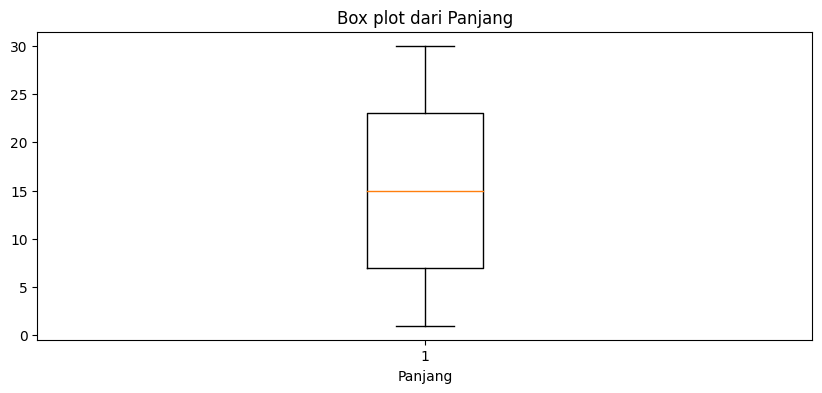

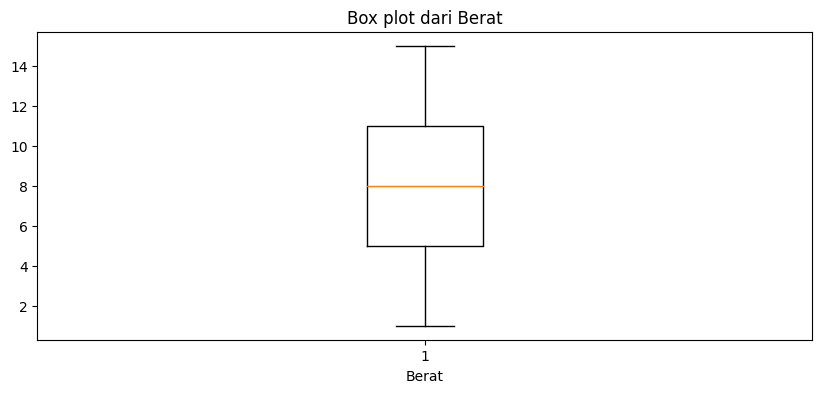

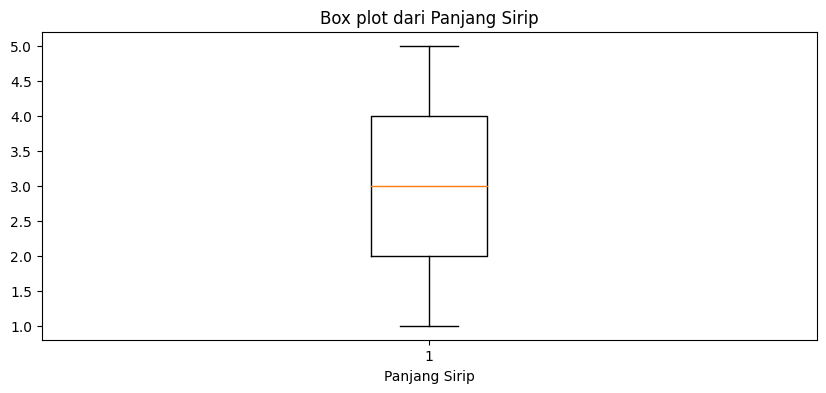

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi outlier pada kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.boxplot(dataset[col])
    plt.title(f'Box plot dari {col}')
    plt.xlabel(col)
    plt.show()

# Mengidentifikasi outlier menggunakan IQR dan menangani dengan clipping
for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    dataset[col] = np.clip(dataset[col], batas_bawah, batas_atas)


**TRANSFORMASI**

Transformasi Data (Scaling dan Encoding)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Transformasi: One-Hot Encoding untuk kolom kategorikal dan Standardisasi untuk kolom numerik
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan transformasi numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Menerapkan transformasi pada data latih dan data uji
X_train = preprocessor.fit_transform(X_train)
  X_test = preprocessor.transform(X_test)

print("Data latih setelah transformasi:")
print(X_train)


Data latih setelah transformasi:
[[ 1.46109269 -0.31072254 -0.08547682 ...  0.          0.
   1.        ]
 [ 0.53864409 -0.83562337 -0.89678224 ...  0.          1.
   0.        ]
 [ 1.57639877 -1.88542503  1.53713401 ...  0.          0.
   0.        ]
 ...
 [-0.72972273 -1.09807379 -0.89678224 ...  0.          1.
   0.        ]
 [-0.61441666  0.4766287  -1.70808765 ...  1.          0.
   0.        ]
 [-0.96033488  0.4766287  -0.89678224 ...  1.          0.
   0.        ]]


Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data numerik
scaler = MinMaxScaler()

# Dengan asumsi kolom numerik adalah 'n' kolom pertama setelah transformasi
# Ganti 'n' dengan jumlah kolom numerik yang sebenarnya
n = len(numerical_cols)
X_train[:, :n] = scaler.fit_transform(X_train[:, :n])
X_test[:, :n] = scaler.transform(X_test[:, :n])

print("Data setelah normalisasi:")
print(X_train)

Data setelah normalisasi:
[[0.93103448 0.42857143 0.5        ... 0.         0.         1.        ]
 [0.65517241 0.28571429 0.25       ... 0.         1.         0.        ]
 [0.96551724 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.27586207 0.21428571 0.25       ... 0.         1.         0.        ]
 [0.31034483 0.64285714 0.         ... 1.         0.         0.        ]
 [0.20689655 0.64285714 0.25       ... 1.         0.         0.        ]]


logaritmik

In [ ]:
import numpy as np

# Dengan asumsi 'n' kolom pertama dalam X_train dan X_test adalah numerik setelah transformasi
n = len(numerical_cols)
for i in range(n):
    X_train[:, i] = np.log1p(X_train[:, i])
    X_test[:, i] = np.log1p(X_test[:, i])

    # Menampilkan hasil logaritmik
print("Data setelah logaritmik:")
print(X_train)

Data setelah logaritmik:
[[0.65805586 0.35667494 0.40546511 ... 0.         0.         1.        ]
 [0.50390518 0.25131443 0.22314355 ... 0.         1.         0.        ]
 [0.67575544 0.         0.69314718 ... 0.         0.         0.        ]
 ...
 [0.24362208 0.19415601 0.22314355 ... 0.         1.         0.        ]
 [0.27029033 0.49643689 0.         ... 1.         0.         0.        ]
 [0.18805223 0.49643689 0.22314355 ... 1.         0.         0.        ]]


Fitur Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Menambahkan fitur polinomial hingga derajat ke-2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Data setelah fitur polinomial:")
print(X_train_poly)


Data setelah fitur polinomial:
[[0.65805586 0.35667494 0.40546511 ... 0.         0.         1.        ]
 [0.50390518 0.25131443 0.22314355 ... 1.         0.         0.        ]
 [0.67575544 0.         0.69314718 ... 0.         0.         0.        ]
 ...
 [0.24362208 0.19415601 0.22314355 ... 1.         0.         0.        ]
 [0.27029033 0.49643689 0.         ... 0.         0.         0.        ]
 [0.18805223 0.49643689 0.22314355 ... 0.         0.         0.        ]]


Pca

In [ ]:
from sklearn.decomposition import PCA

# Ekstraksi fitur dengan PCA untuk mengurangi dimensi
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Data setelah PCA:")
print(X_train_pca)



Data setelah PCA:
[[ 0.19399304  0.03552882 -0.5560634  ... -0.60859958 -0.38714855
  -0.16139759]
 [-0.59269228  0.08176575 -0.06485477 ... -0.53123314 -0.34056677
   0.07168931]
 [ 0.32956859  0.23202069 -0.16468389 ...  0.25183923 -0.52410171
  -0.40740483]
 ...
 [ 0.12324523 -0.16514667  0.08740786 ... -0.3661072  -0.86409074
   0.2226024 ]
 [ 0.24074066 -0.88481866 -0.28732457 ... -0.22523896  0.67179789
   0.33883512]
 [-0.63615804 -0.87907083  0.09200484 ...  0.54997389  0.49759928
   0.24134125]]


**DATA MINING**

Seleksi Fitur

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Menghitung mutual information
mi = mutual_info_classif(X_train, y_train, discrete_features='auto')
mi_series = pd.Series(mi, index=preprocessor.get_feature_names_out())
mi_series.sort_values(ascending=False, inplace=True)


# Menampilkan skor mutual information
print("Mutual Information Scores:")
print(mi_series)

# Memilih fitur dengan mutual information tertinggi
selected_features = mi_series[mi_series > 0].index.tolist()


# Menampilkan fitur yang dipilih
print(f"Selected Features: {selected_features}")

# Menggunakan fitur yang dipilih untuk pelatihan
X_train_selected = X_train[:, mi_series.index.isin(selected_features)]
X_test_selected = X_test[:, mi_series.index.isin(selected_features)]


Mutual Information Scores:
num__Panjang                          0.077502
num__Berat                            0.039416
cat__Bentuk Kepala_Bulat              0.031700
cat__Warna_Coklat                     0.021237
cat__Bentuk Sirip_Dorsal              0.016652
cat__Bentuk Sirip_Pectoral            0.016038
cat__Bentuk Kepala_Moncong runcing    0.015435
cat__Warna_Biru                       0.009409
cat__Bentuk Kepala_Panjang pipih      0.009220
cat__Bentuk Sirip_Caudal              0.009068
cat__Warna_Kuning                     0.001367
num__Panjang Sirip                    0.000000
cat__Warna_Hitam                      0.000000
cat__Bentuk Sirip_Anal                0.000000
cat__Bentuk Kepala_Lebar datar        0.000000
dtype: float64
Selected Features: ['num__Panjang', 'num__Berat', 'cat__Bentuk Kepala_Bulat', 'cat__Warna_Coklat', 'cat__Bentuk Sirip_Dorsal', 'cat__Bentuk Sirip_Pectoral', 'cat__Bentuk Kepala_Moncong runcing', 'cat__Warna_Biru', 'cat__Bentuk Kepala_Panjang pipih', 'ca

Melatih Model SVM

In [ ]:
from sklearn.svm import SVC

# Melatih model SVM dengan fitur yang dipilih
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_selected, y_train)

# Evaluasi model awal
initial_accuracy = svm_model.score(X_test_selected, y_test)
print(f"Initial Model Accuracy: {initial_accuracy}")


Initial Model Accuracy: 0.7


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train_selected, y_train)

# Menampilkan parameter terbaik dan skor terbaik
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

**Evaluasi**

Evaluasi Model dengan Metrik Tambahan

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Membuat prediksi dengan model terbaik
y_pred = grid_search.predict(X_test_selected)
y_pred_proba = grid_search.decision_function(X_test_selected)

# Evaluasi kinerja model
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Ya')
recall = recall_score(y_test, y_pred, pos_label='Ya')
f1 = f1_score(y_test, y_pred, pos_label='Ya')
roc_auc = roc_auc_score(y_test.map({'Tidak': 0, 'Ya': 1}), y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")


Confusion Matrix:
[[16 19]
 [19 86]]

Classification Report:
              precision    recall  f1-score   support

       Tidak       0.46      0.46      0.46        35
          Ya       0.82      0.82      0.82       105

    accuracy                           0.73       140
   macro avg       0.64      0.64      0.64       140
weighted avg       0.73      0.73      0.73       140

Precision: 0.819047619047619
Recall: 0.819047619047619
F1-Score: 0.819047619047619
ROC AUC: 0.7317006802721088
Accuracy: 0.7285714285714285


Visualisasi Evaluasi

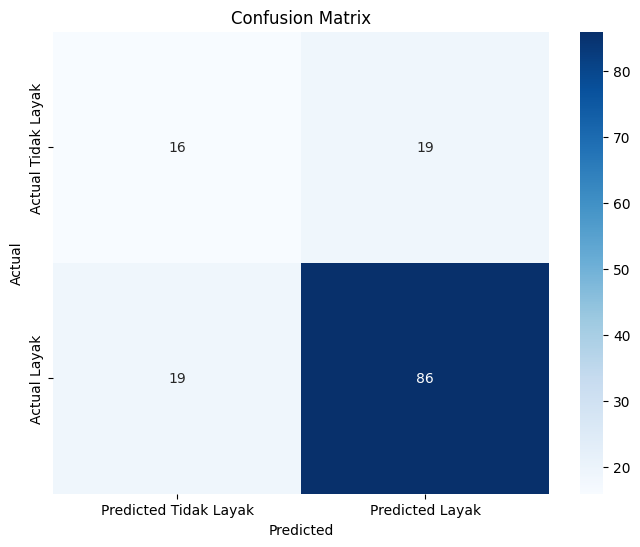

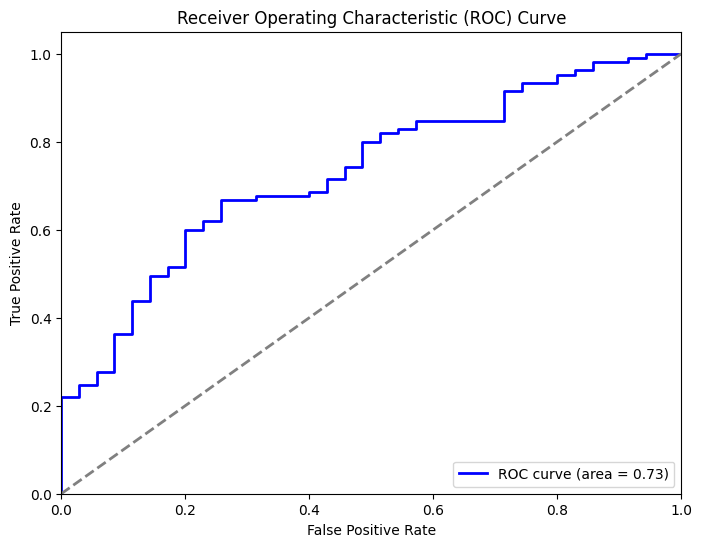

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Menghitung ROC curve dan AUC
fpr, tpr, _ = roc_curve(y_test.map({'Tidak': 0, 'Ya': 1}), y_pred_proba)
roc_auc = auc(fpr, tpr)

# Menampilkan Confusion Matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Tidak Layak', 'Predicted Layak'], yticklabels=['Actual Tidak Layak', 'Actual Layak'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Menampilkan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pickle # Import the pickle module

with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file) # Now you can use pickle.dump()

In [ ]:
with open('svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)
